<a href="https://colab.research.google.com/github/Gopib03/Pytorch_Models/blob/main/LeNet_from_scratch_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LeNet using Pytorch

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
torch.use_deterministic_algorithms(True)


In [11]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()

    self.cn1 = nn.Conv2d(3, 6, 5)
    self.cn2 = nn.Conv2d(6, 16, 5)

    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.cn1(x))
    x = F.max_pool2d(x, (2,2))
    x = F.relu(self.cn2(x))
    x = F.max_pool2d(x, (2,2))

    x = x.view(-1, self.flattened_features(x))


 # Fully connected operations
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def flattened_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

lenet = LeNet()
print(lenet)


LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


 the training routine, that is, the actual backpropagation step:

In [12]:
def train(net, trainloader, optim , epoch):
  loss_total = 0.0
  for i, data in enumerate(trainloader, 0):
    ip, ground_truth = data
    optim.zero_grad()
    op = net(ip)
    loss = nn.CrossEntropyLoss()(op, ground_truth)
    loss.backward()
    optim.step()

    loss_total += loss.item()

    if (i+1) %1000 == 0:
       print(']Epoch number: %d, Mini-batches:%5d\
       loss:%3f' % (epoch +1, i+1, loss_total/200))
       loss_total = 0.0


the test routine that we will use to evaluate model performance:

In [13]:
def test(net, testloader):
    success = 0
    counter = 0
    with torch.no_grad():
        for data in testloader:
            im, ground_truth = data
            op = net(im)
            _, pred = torch.max(op.data, 1)
            counter += ground_truth.size(0)
            success += (pred == ground_truth).sum().item()
    print('LeNet accuracy on 10000 images from test dataset: %d %%'\
        % (100 * success / counter))


Using the CIFAR-10 dataset.

In [14]:
# The mean and std are kept as 0.5 for normalizing
# pixel values as the pixel values are originally
# in the range 0 to 1
train_transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(32, 4),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),
                          (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',
    train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset,
    batch_size=8, shuffle=True)
test_transform = transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data',
    train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset,
    batch_size=10000, shuffle=False)
# ordering is important
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
           'frog', 'horse', 'ship', 'truck')


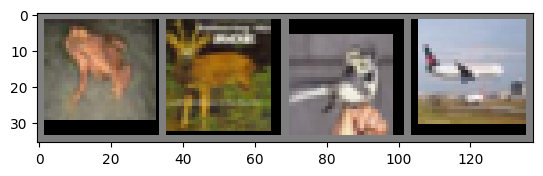

 frog ||deer ||bird ||plane


In [15]:
def imageshow(image):

  image = image/2 + 0.5
  npimage = image.numpy()
  plt.imshow(np.transpose(npimage, (1, 2, 0)))
  plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

num_images = 4
imageshow(torchvision.utils.make_grid(images[:num_images]))

print(' '+' ||'.join(classes[labels[j]]
                     for j in range(num_images)))

The preceding output shows us four color images that are 32x32 pixels in size. These four images belong to four different labels, as displayed in the text following the images.

Training LeNet:

define the optimizer and start the training loop

In [16]:
optim = torch.optim.Adam(lenet.parameters(), lr=0.001)

for epoch in range(50):
  train(lenet, trainloader, optim, epoch)
  print()
  test(lenet, testloader)
  print()
  print('Finished Training')


]Epoch number: 1, Mini-batches: 1000       loss:9.792398
]Epoch number: 1, Mini-batches: 2000       loss:8.771636
]Epoch number: 1, Mini-batches: 3000       loss:8.277514
]Epoch number: 1, Mini-batches: 4000       loss:8.177211
]Epoch number: 1, Mini-batches: 5000       loss:7.909911
]Epoch number: 1, Mini-batches: 6000       loss:7.728418

LeNet accuracy on 10000 images from test dataset: 48 %

Finished Training
]Epoch number: 2, Mini-batches: 1000       loss:7.516054
]Epoch number: 2, Mini-batches: 2000       loss:7.495715
]Epoch number: 2, Mini-batches: 3000       loss:7.326350
]Epoch number: 2, Mini-batches: 4000       loss:7.086241
]Epoch number: 2, Mini-batches: 5000       loss:7.084050
]Epoch number: 2, Mini-batches: 6000       loss:7.027615

LeNet accuracy on 10000 images from test dataset: 53 %

Finished Training
]Epoch number: 3, Mini-batches: 1000       loss:6.921332
]Epoch number: 3, Mini-batches: 2000       loss:6.839989
]Epoch number: 3, Mini-batches: 3000       loss:6.72

In [17]:
model_path = './cifar_maodel.pth'
torch.save(lenet.state_dict(),model_path)

Testing LeNet

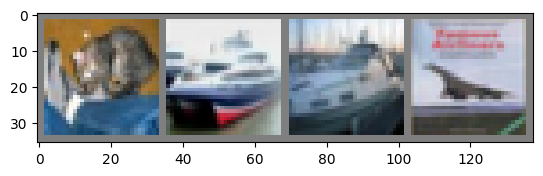

Label:         cat  ship  ship plane
Prediction:    cat  ship truck  ship


In [18]:
# load test dataset images
d_iter = iter(testloader)
im, ground_truth = next(d_iter)
# print images and ground truth
imageshow(torchvision.utils.make_grid(im[:4]))
print('Label:      ', ' '.join('%5s' %
                               classes[ground_truth[j]]
                               for j in range(4)))
# load model
lenet_cached = LeNet()
lenet_cached.load_state_dict(torch.load(model_path))
# model inference
op = lenet_cached(im)
# print predictions
_, pred = torch.max(op, 1)
print('Prediction: ', ' '.join('%5s' % classes[pred[j]]
                               for j in range(4)))


check the overall accuracy of this model on the test dataset as well as the per-class accuracy:

In [20]:
success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data
        op = lenet_cached(im)
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()
print('Model accuracy on 10000 images from test dataset: %d %%' % (100 * success / counter))

Model accuracy on 10000 images from test dataset: 65 %


For per-class accuracy

In [21]:
class_sucess = list(0. for i in range(10))
class_counter = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data
        op = lenet_cached(im)
        _, pred = torch.max(op, 1)
        c = (pred == ground_truth).squeeze()
        for i in range(10000):
            ground_truth_curr = ground_truth[i]
            class_sucess[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1
for i in range(10):
    print('Model accuracy for class %5s : %2d %%' % (
        classes[i], 100 * class_sucess[i] / class_counter[i]))


Model accuracy for class plane : 61 %
Model accuracy for class   car : 77 %
Model accuracy for class  bird : 47 %
Model accuracy for class   cat : 37 %
Model accuracy for class  deer : 53 %
Model accuracy for class   dog : 60 %
Model accuracy for class  frog : 83 %
Model accuracy for class horse : 70 %
Model accuracy for class  ship : 79 %
Model accuracy for class truck : 85 %
